# Diamonds - 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
import h2o
import os
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
diamonds = pd.read_csv('input/diamonds_train.csv')
diamonds_dumies = pd.read_csv('input/diamonds_train.csv')

In [13]:
diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,Ideal,E,VS1,61.9,56.0,5.09,5.12,3.16,1716
40341,40341,0.33,Ideal,D,VS2,61.8,56.0,4.40,4.44,2.73,781
40342,40342,0.40,Premium,G,VVS1,61.5,58.0,4.69,4.74,2.90,1123
40343,40343,1.06,Ideal,I,VS1,61.2,57.0,6.59,6.56,4.03,5651


In [14]:
y = diamonds.price
X = diamonds.iloc[:,:-1]

In [15]:
X.set_index('id',inplace=True)

In [16]:
y

0        3446
1         732
2         475
3        9552
4        1276
         ... 
40340    1716
40341     781
40342    1123
40343    5651
40344    3959
Name: price, Length: 40345, dtype: int64

In [17]:
X.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [18]:
X.describe()

,carat,depth,table,x,y,z
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958
std,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


In [19]:
X.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.023118,0.181725,0.976267,0.945757,0.968685
depth,0.023118,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,0.092482,0.154399,0.985385,0.960350,1.000000


In [20]:
X.color.value_counts()

G    8462
E    7292
F    7133
H    6200
D    5094
I    4094
J    2070
Name: color, dtype: int64

In [21]:
color = {'D': 1,'E': 2,'F':3, 'G':4, 'H':5, 'I': 6, 'J':7}
X.color = [color[item] for item in X.color]

In [22]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,Premium,3,VS1,61.5,58.0,5.93,5.98,3.66
1,0.31,Ideal,1,SI1,60.8,56.0,4.37,4.32,2.64
2,0.30,Ideal,3,SI1,62.3,54.0,4.30,4.34,2.69
3,1.04,Ideal,2,VVS2,62.0,58.0,6.54,6.46,4.03
4,0.65,Ideal,7,SI1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,Ideal,2,VS1,61.9,56.0,5.09,5.12,3.16
40341,0.33,Ideal,1,VS2,61.8,56.0,4.40,4.44,2.73
40342,0.40,Premium,4,VVS1,61.5,58.0,4.69,4.74,2.90


In [23]:
X.clarity.value_counts()

SI1     9710
VS2     9164
SI2     6884
VS1     6092
VVS2    3839
VVS1    2738
IF      1357
I1       561
Name: clarity, dtype: int64

In [24]:
clarity = {'SI1': 1, 'VS2': 2,'SI2': 3,'VS1':4, 'VVS2':5, 'VVS1':6, 'IF': 7, 'I1':8}
X.clarity = [clarity[item] for item in X.clarity]

In [25]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,Premium,3,4,61.5,58.0,5.93,5.98,3.66
1,0.31,Ideal,1,1,60.8,56.0,4.37,4.32,2.64
2,0.30,Ideal,3,1,62.3,54.0,4.30,4.34,2.69
3,1.04,Ideal,2,5,62.0,58.0,6.54,6.46,4.03
4,0.65,Ideal,7,1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,Ideal,2,4,61.9,56.0,5.09,5.12,3.16
40341,0.33,Ideal,1,2,61.8,56.0,4.40,4.44,2.73
40342,0.40,Premium,4,6,61.5,58.0,4.69,4.74,2.90


In [26]:
X.cut.value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

In [27]:
cut = {'Ideal': 1, 'Premium': 2,'Very Good': 3,'Good':4, 'Fair':5}
X.cut = [cut[item] for item in X.cut]

In [28]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,2,3,4,61.5,58.0,5.93,5.98,3.66
1,0.31,1,1,1,60.8,56.0,4.37,4.32,2.64
2,0.30,1,3,1,62.3,54.0,4.30,4.34,2.69
3,1.04,1,2,5,62.0,58.0,6.54,6.46,4.03
4,0.65,1,7,1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,1,2,4,61.9,56.0,5.09,5.12,3.16
40341,0.33,1,1,2,61.8,56.0,4.40,4.44,2.73
40342,0.40,2,4,6,61.5,58.0,4.69,4.74,2.90


In [29]:
X.corr()

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,0.132754,0.291382,-0.155052,0.023118,0.181725,0.976267,0.945757,0.968685
cut,0.132754,1.000000,0.018865,-0.093632,0.213022,0.432025,0.124552,0.119245,0.149094
color,0.291382,0.018865,1.000000,0.042550,0.044171,0.026576,0.270998,0.262095,0.273173
clarity,-0.155052,-0.093632,0.042550,1.000000,-0.028916,-0.089991,-0.182480,-0.174818,-0.183647
depth,0.023118,0.213022,0.044171,-0.028916,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,0.432025,0.026576,-0.089991,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,0.124552,0.270998,-0.182480,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,0.119245,0.262095,-0.174818,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,0.149094,0.273173,-0.183647,0.092482,0.154399,0.985385,0.960350,1.000000


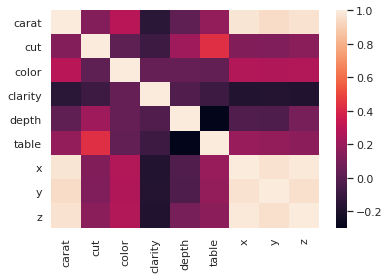

In [30]:
ax = sns.heatmap(X.corr())

In [31]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
#     Normalizer(),
]

tr = make_pipeline(*pipeline)

X_norm = tr.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = X.columns)

In [32]:
X_norm

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.037316,-0.084332,-0.348974,0.535023,-0.174910,0.246448,0.177558,0.212929,0.175592
1,-1.028243,-0.980870,-1.524998,-1.137752,-0.665206,-0.648784,-1.213123,-1.228642,-1.291969
2,-1.049327,-0.980870,-0.348974,-1.137752,0.385428,-1.544015,-1.275525,-1.211273,-1.220030
3,0.510857,-0.980870,-0.936986,1.092614,0.175301,0.246448,0.721350,0.629768,0.707943
4,-0.311402,-0.980870,2.003073,-1.137752,-0.244952,-1.096399,-0.134454,-0.099701,-0.140941
...,...,...,...,...,...,...,...,...,...
40340,-0.627656,-0.980870,-0.936986,0.535023,0.105259,-0.648784,-0.571270,-0.533909,-0.543801
40341,-0.986076,-0.980870,-1.524998,-0.580161,0.035216,-0.648784,-1.186379,-1.124432,-1.162479
40342,-0.838491,-0.084332,0.239038,1.650206,-0.174910,0.246448,-0.927855,-0.863907,-0.917885
40343,0.553024,-0.980870,1.415062,0.535023,-0.385037,-0.201168,0.765923,0.716610,0.707943


In [33]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_norm[columns], y, test_size=0.01, random_state=42)

# Random Forest

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [55]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [56]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=80, min_samples_leaf=3)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_norm[columns], y, test_size=0.01, random_state=42)

In [58]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.9908260923887552
0.9812330305801867


In [60]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, rf_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('R2', r2_score(y_test, rf_reg.predict(X_test)))

METRIC SUMMARY
MSE 313524.4653186928
RMSE 559.9325542587186
MSLE 0.012076246088428584
MAE 300.9049355054957
R2 0.9812330305801866


# Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gb_reg = GradientBoostingRegressor(n_estimators= 500, max_depth= 80, min_samples_split= 5, learning_rate= 0.01, loss='ls')

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=80, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
print(gb_reg.score(X_train, y_train))
print(gb_reg.score(X_test, y_test))

0.99909757300555
0.9755966082194912


In [64]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, gb_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, gb_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, gb_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, gb_reg.predict(X_test)))
print('R2', r2_score(y_test, gb_reg.predict(X_test)))

METRIC SUMMARY
MSE 407687.58070596994
RMSE 638.5041743841382
MSLE 0.015997802898207132
MAE 332.6792883661788
R2 0.9755966082194911


# H20

In [65]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

In [66]:
h2o.init(ip="127.0.0.1", port="8080")

Checking whether there is an H2O instance running at http://127.0.0.1:8080 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplwzk4hkb
  JVM stdout: /tmp/tmplwzk4hkb/h2o_root_started_from_python.out
  JVM stderr: /tmp/tmplwzk4hkb/h2o_root_started_from_python.err
  Server is running at http://127.0.0.1:8080
Connecting to H2O server at http://127.0.0.1:8080 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_root_vsrk1j
H2O cluster total nodes:,1
H2O cluster free memory:,7.811 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


# Random Forest H2O

In [70]:
y = pd.DataFrame(y)

In [71]:
X_norm_price = X_norm.merge(y, left_index=True, right_index=True)

In [72]:
data = h2o.H2OFrame(X_norm_price)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [73]:
training_columns = ['carat', 'cut', 'color', 'clarity', 'depth']
response_column = 'price'

In [74]:
train, test = data.split_frame(ratios=[0.99])

In [75]:
model_forest_h2o = H2ORandomForestEstimator(ntrees=400, max_depth=30, nfolds=20)
model_forest_h2o.train(x=training_columns, y=response_column, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [76]:
performance = model_forest_h2o.model_performance(test_data=test)

In [77]:
print(performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2058308.8540050376
RMSE: 1434.6807498551855
MAE: 988.7503288753361
RMSLE: 0.571683789244536
Mean Residual Deviance: 2058308.8540050376



# Auto Magic Learning H2O

In [78]:
data = h2o.H2OFrame(X_norm_price)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [79]:
X_norm_price

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.037316,-0.084332,-0.348974,0.535023,-0.174910,0.246448,0.177558,0.212929,0.175592,3446
1,-1.028243,-0.980870,-1.524998,-1.137752,-0.665206,-0.648784,-1.213123,-1.228642,-1.291969,732
2,-1.049327,-0.980870,-0.348974,-1.137752,0.385428,-1.544015,-1.275525,-1.211273,-1.220030,475
3,0.510857,-0.980870,-0.936986,1.092614,0.175301,0.246448,0.721350,0.629768,0.707943,9552
4,-0.311402,-0.980870,2.003073,-1.137752,-0.244952,-1.096399,-0.134454,-0.099701,-0.140941,1276
...,...,...,...,...,...,...,...,...,...,...
40340,-0.627656,-0.980870,-0.936986,0.535023,0.105259,-0.648784,-0.571270,-0.533909,-0.543801,1716
40341,-0.986076,-0.980870,-1.524998,-0.580161,0.035216,-0.648784,-1.186379,-1.124432,-1.162479,781
40342,-0.838491,-0.084332,0.239038,1.650206,-0.174910,0.246448,-0.927855,-0.863907,-0.917885,1123
40343,0.553024,-0.980870,1.415062,0.535023,-0.385037,-0.201168,0.765923,0.716610,0.707943,5651


In [80]:
y = 'price'

In [81]:
model_auto_h2o = H2OAutoML(max_models=20, nfolds = 5, max_runtime_secs=300)

In [82]:
# model_auto_h2o.train(y=response_column, training_frame=train)
model_auto_h2o.train(y = y, training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [83]:
model_auto_h2o

In [84]:
lb = model_auto_h2o.leaderboard

In [85]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200302_112227,286727,535.469,286727,266.015,0.0906412
StackedEnsemble_BestOfFamily_AutoML_20200302_112227,290346,538.838,290346,269.116,0.0926251
XGBoost_1_AutoML_20200302_112227,290477,538.959,290477,269.466,0.0928373
XGBoost_2_AutoML_20200302_112227,295074,543.207,295074,267.272,0.089291
XGBoost_3_AutoML_20200302_112227,304578,551.886,304578,290.052,0.108153
GLM_1_AutoML_20200302_112227,1.59554e+07,3994.42,1.59554e+07,3033.61,1.12611


# KERAS

In [90]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [93]:
# Define model
model_keras = Sequential()
model_keras.add(Dense(500, input_dim=5, activation= "relu"))
model_keras.add(Dense(100, activation= "relu"))
model_keras.add(Dense(50, activation= "relu"))
model_keras.add(Dense(1))
model_keras.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 58,201
Trainable params: 58,201
Non-trainable params: 0
_________________________________________________________________


In [96]:
model_keras.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_keras.fit(X_train, y_train, epochs=10, verbose=2);

Epoch 1/10
 - 2s - loss: 386075.3652 - mean_squared_error: 386075.2188
Epoch 2/10
 - 1s - loss: 374388.0228 - mean_squared_error: 374387.6562
Epoch 3/10
 - 1s - loss: 377071.4252 - mean_squared_error: 377071.3750
Epoch 4/10
 - 1s - loss: 374020.9038 - mean_squared_error: 374020.7500
Epoch 5/10
 - 1s - loss: 367537.3826 - mean_squared_error: 367537.4688
Epoch 6/10
 - 2s - loss: 372234.9280 - mean_squared_error: 372234.8125
Epoch 7/10
 - 2s - loss: 361278.6722 - mean_squared_error: 361278.3125
Epoch 8/10
 - 2s - loss: 364182.6375 - mean_squared_error: 364182.9062
Epoch 9/10
 - 2s - loss: 358024.8686 - mean_squared_error: 358025.0625
Epoch 10/10
 - 2s - loss: 360456.5107 - mean_squared_error: 360456.5000


In [97]:
pred_train= model_keras.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model_keras.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

581.1780865653817
653.3251550346806


In [98]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, model_keras.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, model_keras.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, model_keras.predict(X_test)))
print('MAE', mean_absolute_error(y_test, model_keras.predict(X_test)))
print('R2', r2_score(y_test, model_keras.predict(X_test)))

METRIC SUMMARY
MSE 426833.7582010894
RMSE 653.3251550346806
MSLE 0.016185971996298062
MAE 353.4206172452115
R2 0.9744505549850426


# Diamonds Test

In [99]:
diamonds_test = pd.read_csv('input/diamonds_test.csv')

In [100]:
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,Premium,E,VS2,60.0,58.0,4.37,4.40,2.63
13445,13445,0.55,Ideal,D,VVS2,60.8,56.0,5.31,5.34,3.24
13446,13446,0.23,Very Good,E,VVS1,61.3,58.0,3.94,3.96,2.42
13447,13447,0.30,Ideal,D,VS2,61.4,58.0,4.29,4.31,2.64


In [101]:
diamonds_test.set_index('id',inplace=True)

In [102]:
diamonds_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...
13444,0.30,Premium,E,VS2,60.0,58.0,4.37,4.40,2.63
13445,0.55,Ideal,D,VVS2,60.8,56.0,5.31,5.34,3.24
13446,0.23,Very Good,E,VVS1,61.3,58.0,3.94,3.96,2.42


In [103]:
color = {'D': 1,'E': 2,'F':3, 'G':4, 'H':5, 'I': 6, 'J':7}
diamonds_test.color = [color[item] for item in diamonds_test.color]

In [104]:
clarity = {'SI1': 1, 'VS2': 2,'SI2': 3,'VS1':4, 'VVS2':5, 'VVS1':6, 'IF': 7, 'I1':8}
diamonds_test.clarity = [clarity[item] for item in diamonds_test.clarity]

In [105]:
cut = {'Ideal': 1, 'Premium': 2,'Very Good': 3,'Good':4, 'Fair':5}
diamonds_test.cut = [cut[item] for item in diamonds_test.cut]

In [106]:
diamonds_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,1.10,2,5,3,62.2,58.0,6.69,6.60,4.13
1,0.51,1,6,1,62.5,57.0,5.07,5.10,3.18
2,2.03,2,4,1,61.9,59.0,8.14,8.09,5.02
3,1.21,2,3,1,60.0,60.0,6.96,6.91,4.16
4,0.55,1,3,1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...
13444,0.30,2,2,2,60.0,58.0,4.37,4.40,2.63
13445,0.55,1,1,5,60.8,56.0,5.31,5.34,3.24
13446,0.23,3,2,6,61.3,58.0,3.94,3.96,2.42


In [107]:
pipeline = [
    StandardScaler(),
#     Normalizer(),
]

tr = make_pipeline(*pipeline)

X_norm_test = tr.fit_transform(diamonds_test)
X_norm_test = pd.DataFrame(X_norm_test, columns = diamonds_test.columns)

In [108]:
X_norm_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.641654,-0.090572,0.825150,-0.004962,0.318043,0.231081,0.856946,0.780253,0.802251
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896,-0.216898,-0.592755,-0.571521,-0.491658
2,2.617757,-0.090572,0.237766,-1.126452,0.109191,0.679059,2.154518,2.123014,2.014439
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540,1.127037,1.098563,1.059619,0.843111
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574,-1.112854,-0.413779,-0.463379,-0.409938
...,...,...,...,...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540,0.231081,-1.219169,-1.202348,-1.240763
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601,-0.664876,-0.377984,-0.355237,-0.409938
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514,0.231081,-1.603966,-1.598868,-1.526785
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896,0.231081,-1.290759,-1.283454,-1.227143


In [109]:
X_norm_test = X_norm_test.iloc[:,:-4]

In [110]:
X_norm_test

,carat,cut,color,clarity,depth
0,0.641654,-0.090572,0.825150,-0.004962,0.318043
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896
2,2.617757,-0.090572,0.237766,-1.126452,0.109191
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574
...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896


# Sklearn

In [111]:
regre_forest_test = rf_reg.predict(X_norm_test)

In [112]:
regre_forest_test

array([ 4517.79307831,  1041.31672822, 16704.90845079, ...,
         511.04806245,   706.67253521,  2055.24531193])

In [113]:
X_norm_forest = X_norm_test.copy()

In [114]:
X_norm_test

,carat,cut,color,clarity,depth
0,0.641654,-0.090572,0.825150,-0.004962,0.318043
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896
2,2.617757,-0.090572,0.237766,-1.126452,0.109191
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574
...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896


In [115]:
X_norm_forest['price'] = regre_forest_test

In [116]:
X_norm_forest

,carat,cut,color,clarity,depth,price
0,0.641654,-0.090572,0.825150,-0.004962,0.318043,4517.793078
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896,1041.316728
2,2.617757,-0.090572,0.237766,-1.126452,0.109191,16704.908451
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540,6693.890318
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574,1578.824946
...,...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540,744.004037
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601,2461.679662
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514,511.048062
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896,706.672535


In [117]:
regre_forest_price = X_norm_forest[['price']]

In [118]:
regre_forest_price.reset_index(inplace=True)

In [119]:
regre_forest_price.rename(columns={'index':'id'}, inplace=True)

/home/ivan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [120]:
regre_forest_price.set_index('id',inplace=True)

In [121]:
regre_forest_price.to_csv('output/diamonds_predict_forest.csv')

In [122]:
X_norm_test

,carat,cut,color,clarity,depth
0,0.641654,-0.090572,0.825150,-0.004962,0.318043
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896
2,2.617757,-0.090572,0.237766,-1.126452,0.109191
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574
...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896


In [123]:
gradient_boost_test = gb_reg.predict(X_norm_test)

In [124]:
gradient_boost_test

array([ 4539.61060314,  1052.26473733, 16258.93994124, ...,
         550.5380856 ,   717.91065011,  2045.40551768])

In [125]:
X_norm_test['price'] = gradient_boost_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
gradient_boost_test = X_norm_test[['price']]

In [127]:
gradient_boost_test.reset_index(inplace=True)

In [128]:
gradient_boost_test.rename(columns={'index':'id'}, inplace=True)

/home/ivan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [129]:
gradient_boost_test.set_index('id',inplace=True)

In [130]:
gradient_boost_test.to_csv('output/diamonds_predict_gradient.csv')

# H2O 

In [131]:
data = h2o.H2OFrame(X_norm_test)
h2o_auto = model_auto_h2o.leader.predict(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'table': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'x': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'y': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.6/dist-packages/h2o/job.py:70: UserWarning: Test/Validation dataset is missing column 'z': substituting in a column of NaN
  warnings.warn(w)


In [132]:
perf = model_auto_h2o.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 128200.5181950345
RMSE: 358.0509994330898
MAE: 189.2881321701035
RMSLE: 0.07035457297105066
R^2: 0.9911436126820667
Mean Residual Deviance: 128200.5181950345
Null degrees of freedom: 407
Residual degrees of freedom: 404
Null deviance: 5940813869.169825
Residual deviance: 52305811.423574075
AIC: 5966.484996236757


In [133]:
auto_df = h2o.as_list(h2o_auto)

In [134]:
auto_df.rename(columns={'predict':'price'}, inplace=True)
auto_df.reset_index(inplace=True)
auto_df.rename(columns={'index':'id'}, inplace=True)
auto_df.set_index('id',inplace=True)

In [135]:
auto_df

,price
id,
0,4567.454405
1,1702.483549
2,10573.432470
3,5879.131085
4,1849.600237
...,...
13444,1333.227961
13445,2285.755799
13446,1338.855420


In [136]:
auto_df.to_csv('output/diamonds_predict_h2o_automl.csv')

In [137]:
data = h2o.H2OFrame(X_norm_test)
h2o_forest = model_forest_h2o.predict(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [138]:
perf = model_forest_h2o.model_performance(test)
perf


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2058308.8540050376
RMSE: 1434.6807498551855
MAE: 988.7503288753361
RMSLE: 0.571683789244536
Mean Residual Deviance: 2058308.8540050376


In [139]:
forest_as_pandas = h2o.as_list(h2o_forest)

In [140]:
forest_as_pandas

,predict
0,4812.820287
1,2204.009323
2,12388.094990
3,5917.492994
4,2145.580061
...,...
13444,1716.398642
13445,2431.122470
13446,1012.849339
13447,1767.052110


# Keras

In [ ]:
keras_test = model_keras.predict(X_norm_test)

In [238]:
keras_test

array([[ 4339.766  ],
       [ 1075.472  ],
       [16776.107  ],
       ...,
       [  423.84988],
       [  737.6876 ],
       [ 2061.2976 ]], dtype=float32)

In [239]:
keras_test = pd.DataFrame(keras_test)

In [240]:
keras_test.rename(columns={0:'price'}, inplace=True)
keras_test.reset_index(inplace=True)
keras_test.rename(columns={'index':'id'}, inplace=True)
keras_test.set_index('id',inplace=True)

In [241]:
keras_test

,price
id,
0,4339.766113
1,1075.472046
2,16776.107422
3,6704.907715
4,1495.950073
...,...
13444,604.650879
13445,2470.573242
13446,423.849884


In [242]:
keras_test.to_csv('output/diamonds_predict_keras.csv')